Here is something in Julia

In [ ]:
println("Hello julia!")

Now, here is a for loop in Julia

In [ ]:
for i in 1:1_000_000
    println(i)
end

Now, we start working with `Tidier`

In [2]:
# Load the required libraries
using RDatasets
using Tidier
using Chain

We will work with the `movies` dataset

In [3]:
movies = dataset("ggplot2", "movies");

In [9]:
# Check the first 10 lines
first(movies, 10)

Row,Title,Year,Length,Budget,Rating,Votes,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,MPAA,Action,Animation,Comedy,Drama,Documentary,Romance,Short
,String,Int32,Int32,Int32?,Float64,Int32,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…,Int32,Int32,Int32,Int32,Int32,Int32,Int32
1,$,1971,121,missing,6.4,348,4.5,4.5,4.5,4.5,14.5,24.5,24.5,14.5,4.5,4.5,,0,0,1,1,0,0,0
2,$1000 a Touchdown,1939,71,missing,6.0,20,0.0,14.5,4.5,24.5,14.5,14.5,14.5,4.5,4.5,14.5,,0,0,1,0,0,0,0
3,$21 a Day Once a Month,1941,7,missing,8.2,5,0.0,0.0,0.0,0.0,0.0,24.5,0.0,44.5,24.5,24.5,,0,1,0,0,0,0,1
4,"$40,000",1996,70,missing,8.2,6,14.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.5,45.5,,0,0,1,0,0,0,0
5,"$50,000 Climax Show, The",1975,71,missing,3.4,17,24.5,4.5,0.0,14.5,14.5,4.5,0.0,0.0,0.0,24.5,,0,0,0,0,0,0,0
6,$pent,2000,91,missing,4.3,45,4.5,4.5,4.5,14.5,14.5,14.5,4.5,4.5,14.5,14.5,,0,0,0,1,0,0,0
7,$windle,2002,93,missing,5.3,200,4.5,0.0,4.5,4.5,24.5,24.5,14.5,4.5,4.5,14.5,R,1,0,0,1,0,0,0
8,'15',2002,25,missing,6.7,24,4.5,4.5,4.5,4.5,4.5,14.5,14.5,14.5,4.5,14.5,,0,0,0,0,1,0,1
9,'38,1987,97,missing,6.6,18,4.5,4.5,4.5,0.0,0.0,0.0,34.5,14.5,4.5,24.5,,0,0,0,1,0,0,0


In [10]:
# Describe the dataset
describe(movies, :nmissing)

Row,variable,nmissing
,Symbol,Int64
1,Title,0
2,Year,0
3,Length,0
4,Budget,53573
5,Rating,0
6,Votes,0
7,R1,0
8,R2,0
9,R3,0


We find the movies with budget

In [4]:
movies_with_budget = @chain movies begin
    @filter(Budget != ismissing(Budget))
end

Row,Title,Year,Length,Budget,Rating,Votes,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,MPAA,Action,Animation,Comedy,Drama,Documentary,Romance,Short
,String,Int32,Int32,Int32?,Float64,Int32,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…,Int32,Int32,Int32,Int32,Int32,Int32,Int32
1,'G' Men,1935,85,450000,7.2,281,0.0,4.5,4.5,4.5,4.5,14.5,34.5,34.5,4.5,4.5,,0,0,0,1,0,0,0
2,'Manos' the Hands of Fate,1966,74,19000,1.6,7996,74.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,14.5,,0,0,0,0,0,0,0
3,'Til There Was You,1997,113,23000000,4.8,799,4.5,4.5,4.5,14.5,14.5,14.5,14.5,4.5,4.5,14.5,PG-13,0,0,1,0,0,1,0
4,.com for Murder,2002,96,5000000,3.7,271,64.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,,0,0,0,0,0,0,0
5,10 Things I Hate About You,1999,97,16000000,6.7,19095,4.5,4.5,4.5,4.5,4.5,14.5,24.5,14.5,14.5,14.5,PG-13,0,0,1,0,0,1,0
6,100 Mile Rule,2002,98,1100000,5.6,181,4.5,4.5,4.5,4.5,14.5,24.5,14.5,14.5,4.5,14.5,R,0,0,1,0,0,0,0
7,100 Proof,1997,94,140000,3.3,19,14.5,14.5,4.5,14.5,14.5,14.5,14.5,0.0,0.0,24.5,,0,0,0,1,0,0,0
8,101,1989,117,200000,7.8,299,4.5,0.0,4.5,4.5,4.5,4.5,4.5,14.5,14.5,45.5,,0,0,0,0,1,0,0
9,101-vy kilometer,2001,103,200000,5.8,7,0.0,0.0,14.5,0.0,0.0,44.5,0.0,14.5,0.0,24.5,,0,0,0,1,0,0,0


In [12]:
# Describe the movies_with_budget dataset
describe(movies_with_budget, :nmissing) # We observe that there is no missing budget now for any of the movies

Row,variable,nmissing
,Symbol,Int64
1,Title,0
2,Year,0
3,Length,0
4,Budget,0
5,Rating,0
6,Votes,0
7,R1,0
8,R2,0
9,R3,0


We report how many movies with budget exist in the dataset

In [13]:
(nrow, ncol) = size(movies_with_budget)
println("There are $nrow movies with budget in the \"movies\" dataset")

There are 5183 movies with budget in the "movies" dataset


Now, we select certain columns for movies that meet certain criteria, as described in the `Tidier` documentation:

In [5]:
select_movies = @chain movies_with_budget begin
    @mutate(Budget_in_mil = Budget /1_000_000)
    @filter(Budget >= mean(Budget))
    @select(Title, Budget_in_mil)
    @slice(1:10)
end

Row,Title,Budget_in_mil
,String,Float64
1,'Til There Was You,23.0
2,10 Things I Hate About You,16.0
3,102 Dalmatians,85.0
4,13 Going On 30,37.0
5,"13th Warrior, The",85.0
6,1492: Conquest of Paradise,47.0
7,15 Minutes,42.0
8,1941,35.0
9,2 Fast 2 Furious,76.0


In [6]:
# We find the top 10 movies based on Budget
top10_budget = @chain movies_with_budget begin
    @mutate(Budget_in_mil = Budget /1_000_000)
    @arrange(desc(Budget_in_mil))
    @select(Title, Budget_in_mil)
    @slice(1:10)
end

Row,Title,Budget_in_mil
,String,Float64
1,Spider-Man 2,200.0
2,Titanic,200.0
3,Troy,185.0
4,Terminator 3: Rise of the Machines,175.0
5,Waterworld,175.0
6,Wild Wild West,170.0
7,Van Helsing,160.0
8,Alexander,150.0
9,Master and Commander: The Far Side of the World,150.0


In [16]:
# We select everything related to "Alexander"
alexander_movie = @chain movies_with_budget begin
    @filter(Title == "Alexander")
end

Row,Title,Year,Length,Budget,Rating,Votes,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,MPAA,Action,Animation,Comedy,Drama,Documentary,Romance,Short
,String,Int32,Int32,Int32?,Float64,Int32,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…,Int32,Int32,Int32,Int32,Int32,Int32,Int32
1,Alexander,2004,175,150000000,5.5,11254,14.5,4.5,4.5,4.5,14.5,14.5,14.5,4.5,4.5,14.5,R,0,0,0,1,0,0,0


We change the order of the columns putting `Rating` and `Votes` first and then everything else

In [17]:
movies_with_budget_2 = @chain movies_with_budget begin
    @select(Rating, Votes, everything())
end

Row,Rating,Votes,Title,Year,Length,Budget,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,MPAA,Action,Animation,Comedy,Drama,Documentary,Romance,Short
,Float64,Int32,String,Int32,Int32,Int32?,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…,Int32,Int32,Int32,Int32,Int32,Int32,Int32
1,7.2,281,'G' Men,1935,85,450000,0.0,4.5,4.5,4.5,4.5,14.5,34.5,34.5,4.5,4.5,,0,0,0,1,0,0,0
2,1.6,7996,'Manos' the Hands of Fate,1966,74,19000,74.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,14.5,,0,0,0,0,0,0,0
3,4.8,799,'Til There Was You,1997,113,23000000,4.5,4.5,4.5,14.5,14.5,14.5,14.5,4.5,4.5,14.5,PG-13,0,0,1,0,0,1,0
4,3.7,271,.com for Murder,2002,96,5000000,64.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,,0,0,0,0,0,0,0
5,6.7,19095,10 Things I Hate About You,1999,97,16000000,4.5,4.5,4.5,4.5,4.5,14.5,24.5,14.5,14.5,14.5,PG-13,0,0,1,0,0,1,0
6,5.6,181,100 Mile Rule,2002,98,1100000,4.5,4.5,4.5,4.5,14.5,24.5,14.5,14.5,4.5,14.5,R,0,0,1,0,0,0,0
7,3.3,19,100 Proof,1997,94,140000,14.5,14.5,4.5,14.5,14.5,14.5,14.5,0.0,0.0,24.5,,0,0,0,1,0,0,0
8,7.8,299,101,1989,117,200000,4.5,0.0,4.5,4.5,4.5,4.5,4.5,14.5,14.5,45.5,,0,0,0,0,1,0,0
9,5.8,7,101-vy kilometer,2001,103,200000,0.0,0.0,14.5,0.0,0.0,44.5,0.0,14.5,0.0,24.5,,0,0,0,1,0,0,0


## Plotting in Julia using TidierPlots

In [8]:
using DataFrames
using CSV

In [9]:
# Read in the .csv file with the `Penguins` data as DataFrame
penguins = DataFrame(CSV.File("/Users/lazarch2/Documents/Julia_for_DS/penguins.csv"))

Row,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
,String15,String15,String7,String7,String3,String7,String7
1,Adelie,Torgersen,39.1,18.7,181,3750,male
2,Adelie,Torgersen,39.5,17.4,186,3800,female
3,Adelie,Torgersen,40.3,18,195,3250,female
4,Adelie,Torgersen,NA,NA,NA,NA,NA
5,Adelie,Torgersen,36.7,19.3,193,3450,female
6,Adelie,Torgersen,39.3,20.6,190,3650,male
7,Adelie,Torgersen,38.9,17.8,181,3625,female
8,Adelie,Torgersen,39.2,19.6,195,4675,male
9,Adelie,Torgersen,34.1,18.1,193,3475,NA


In [37]:
penguins_non_missing = @chain penguins begin
    @filter(bill_length_mm != "NA", bill_depth_mm != "NA")
end

Row,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
,String15,String15,String7,String7,String3,String7,String7
1,Adelie,Torgersen,39.1,18.7,181,3750,male
2,Adelie,Torgersen,39.5,17.4,186,3800,female
3,Adelie,Torgersen,40.3,18,195,3250,female
4,Adelie,Torgersen,36.7,19.3,193,3450,female
5,Adelie,Torgersen,39.3,20.6,190,3650,male
6,Adelie,Torgersen,38.9,17.8,181,3625,female
7,Adelie,Torgersen,39.2,19.6,195,4675,male
8,Adelie,Torgersen,34.1,18.1,193,3475,NA
9,Adelie,Torgersen,42,20.2,190,4250,NA


In [38]:
# Convert certain columns to numeric for the plots
penguins_non_missing.bill_length_mm = parse.(Float64, penguins_non_missing.bill_length_mm)
penguins_non_missing.bill_depth_mm = parse.(Float64, penguins_non_missing.bill_depth_mm)

342-element Vector{Float64}:
 18.7
 17.4
 18.0
 19.3
 20.6
 17.8
 19.6
 18.1
 20.2
 17.1
  ⋮
 19.4
 19.5
 16.5
 17.0
 19.8
 18.1
 18.2
 19.0
 18.7

Now, we group by `species` and `island` and calculate the median `median_length_mm`

In [39]:
median_bill_length_per_species_island = @chain penguins_non_missing begin
    @group_by(species, island)
    @mutate(median_bill_length_mm = median(bill_length_mm))
    @select(species, island, median_bill_length_mm)
end

Row,species,island,median_bill_length_mm
,String15,String15,Float64
1,Adelie,Torgersen,38.9
2,Adelie,Torgersen,38.9
3,Adelie,Torgersen,38.9
4,Adelie,Torgersen,38.9
5,Adelie,Torgersen,38.9
6,Adelie,Torgersen,38.9
7,Adelie,Torgersen,38.9
8,Adelie,Torgersen,38.9
9,Adelie,Torgersen,38.9


If we want to rename a column or columns, we use `@rename`. We need to be careful here, as the data need to be ungrouped before renaming (`DataFrame` instead of `GroupedDataFrame`):

In [47]:
median_bill_length = @chain median_bill_length_per_species_island begin
    @ungroup
    @rename(location = island, median_bill_length = median_bill_length_mm)
end

Row,species,location,median_bill_length
,String15,String15,Float64
1,Adelie,Torgersen,38.9
2,Adelie,Torgersen,38.9
3,Adelie,Torgersen,38.9
4,Adelie,Torgersen,38.9
5,Adelie,Torgersen,38.9
6,Adelie,Torgersen,38.9
7,Adelie,Torgersen,38.9
8,Adelie,Torgersen,38.9
9,Adelie,Torgersen,38.9


In [40]:
# Select the species and the island and then extract only the species column as vector
species_vector = @chain median_bill_length_per_species_island begin
    @select(species, island)
    @ungroup()
    @pull(species)
end

342-element PooledArrays.PooledVector{String15, UInt32, Vector{UInt32}}:
 "Adelie"
 "Adelie"
 "Adelie"
 "Adelie"
 "Adelie"
 "Adelie"
 "Adelie"
 "Adelie"
 "Adelie"
 "Adelie"
 ⋮
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"

In [41]:
# Find the unique species
unique(species_vector)

3-element Vector{String15}:
 "Adelie"
 "Gentoo"
 "Chinstrap"

In [42]:
@glimpse(penguins_non_missing)

Rows: 342
Columns: 7
.species       String15       Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Ad
.island        String15       Torgersen, Torgersen, Torgersen, Torgersen, Torger
.bill_length_mmFloat64        39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 34.1, 42
.bill_depth_mm Float64        18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 18.1, 20
.flipper_length_mmString3        181, 186, 195, 193, 190, 181, 195, 193, 190, 18
.body_mass_g   String7        3750, 3800, 3250, 3450, 3650, 3625, 4675, 3475, 42
.sex           String7        male, female, female, female, male, female, male, 


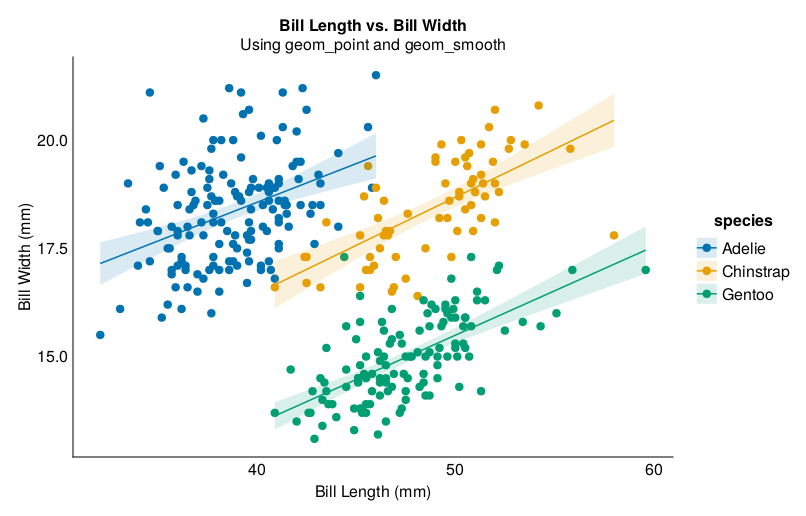

ggplot options


subtitle: Using geom_point and geom_smooth
height: 400
x: Bill Length (mm)
title: Bill Length vs. Bill Width
width: 600
y: Bill Width (mm)

geom_point
data: inherits from plot
x: not specified 
y: not specified 

geom_smooth
data: inherits from plot
x: not specified 
y: not specified 



In [43]:
# Load TidierPlots
using TidierPlots

ggplot(penguins_non_missing, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")) + 
    geom_point() + 
    geom_smooth(method = "lm") +
    labs(x = "Bill Length (mm)", y = "Bill Width (mm)", 
        title = "Bill Length vs. Bill Width", 
        subtitle = "Using geom_point and geom_smooth") +
    theme_minimal()

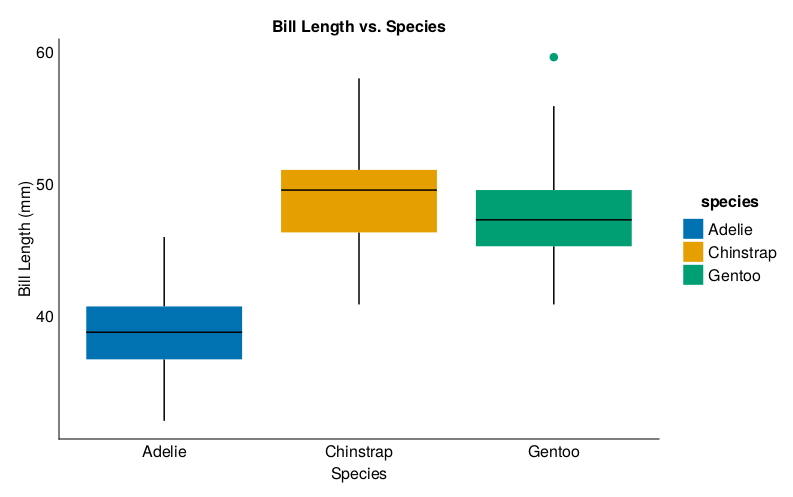

ggplot options


height: 400
x: Species
title: Bill Length vs. Species
width: 600
y: Bill Length (mm)

geom_boxplot
data: inherits from plot
x: not specified 
y: not specified 



In [34]:
# Load TidierPlots
using TidierPlots

ggplot(penguins_non_missing, aes(y = "bill_length_mm", x = "species", color = "species")) + 
    geom_boxplot() + 
    labs(x = "Species", y = "Bill Length (mm)", 
        title = "Bill Length vs. Species"
        ) +
    theme_minimal()

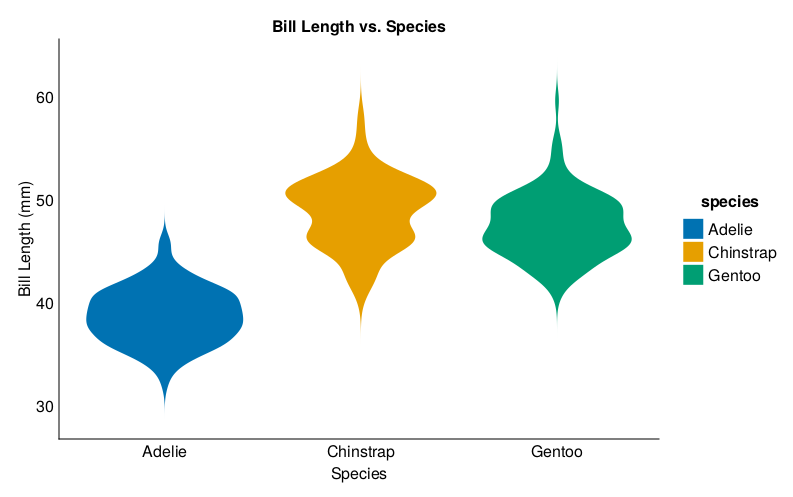

ggplot options


height: 400
x: Species
title: Bill Length vs. Species
width: 600
y: Bill Length (mm)

geom_violin
data: inherits from plot
x: not specified 
y: not specified 



In [25]:
# Load TidierPlots
using TidierPlots

ggplot(penguins_non_missing, aes(y = "bill_length_mm", x = "species", color = "species")) + 
    geom_violin() + 
    labs(x = "Species", y = "Bill Length (mm)", 
        title = "Bill Length vs. Species"
        ) +
    theme_minimal()